In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [114]:
#Import the csv file
titanic= pd.read_csv('titanic-passengers.csv', header = 'infer', sep= ';')

In [115]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [116]:
#show general info 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [117]:
#show statistical info
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
#check the columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:

# Count the missing values per column.
(titanic.isnull()).sum(axis=0)



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
#fill the nan values with the appropriate values
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['Embarked'].fillna(value=titanic.mode().iloc[0], inplace=True)
titanic['Cabin'].fillna(value=titanic['Cabin'].mode().iloc[1], inplace=True)


In [121]:
# Count the missing values per column after cleaning
(titanic.isnull()).sum(axis=0)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

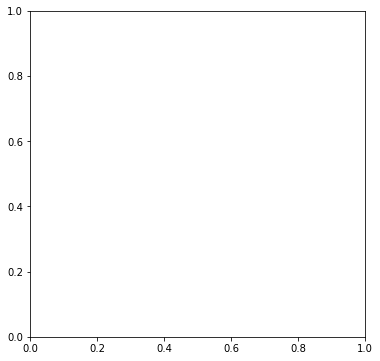

In [122]:

fig,ax= plt.subplots(figsize=(6,6))

Data vizualisation

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

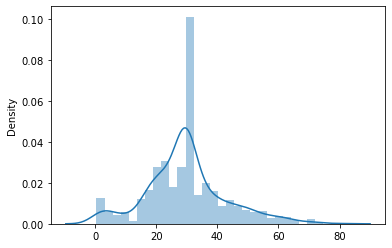

In [123]:
#distribution of the age variable
sns.distplot(x = titanic['Age'])

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

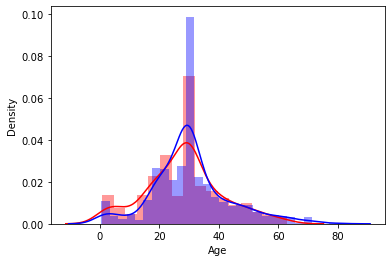

In [124]:
#the corr between age and sex
sns.distplot(titanic[titanic['Sex'] == 'female'].Age, color = 'red')
sns.distplot(titanic[titanic['Sex'] == 'male'].Age, color = 'blue')


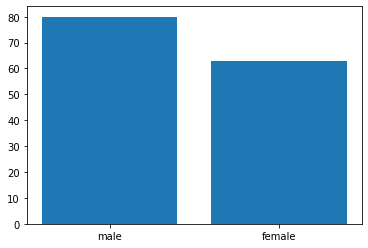

In [125]:
#or using bar plots
plt.bar(titanic.Sex,titanic.Age)
plt.show()

In [126]:
slic_data = titanic[['Sex', 'Survived', 'Age']].copy()
map_sex = {'female': 0,'male': 1} 
#in order to have a correlation matrix we have to convert the values of each variable to a numeric value that's why we have mapped the sex and survivals to 0 and 1

slic_data['Sex'] = slic_data['Sex'].map(map_sex)
map_surviv = {'No': 0,'Yes': 1}
slic_data['Survived'] = slic_data['Survived'].map(map_surviv)
age_sex_surv = slic_data.corr()
age_sex_surv



,Sex,Survived,Age
Sex,1.000000,-0.543351,0.084153
Survived,-0.543351,1.000000,-0.069809
Age,0.084153,-0.069809,1.000000


<AxesSubplot:>

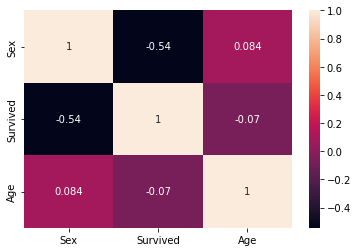

In [127]:
#for a better viz of our corr matrix
sns.heatmap(age_sex_surv, annot=True)

Other features

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

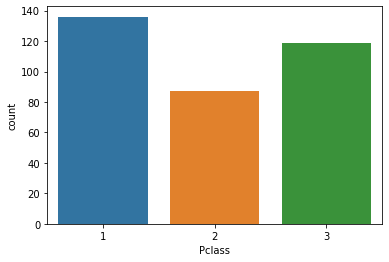

In [128]:
#does the pclass affect the survival
sns.countplot(titanic[(titanic['Survived'] == 'Yes')]['Pclass'])

Let's run the function 

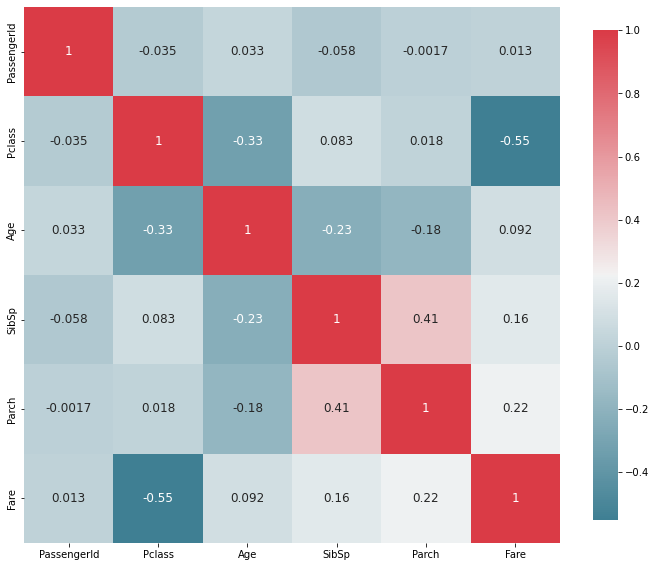

In [129]:
def plot_correlation_map( df ):
    
    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( titanic )

the function draws a heat map  that represents the correlation matrix of our dataframe, it's represented by a figure of the given size with annotations of 12px
In short, it's a representation that calculates the link between each couple of columns in our dataframe and give us a look of how our variables are related to each other

In [130]:
#pclass and survived
titanic.groupby('Pclass').Survived.mean()

TypeError: Could not convert NoNoYesYesYesNoNoNoYesYesNoNoNoYesYesYesYesNoYesNoYesYesYesYesNoNoYesYesNoYesNoYesYesYesYesNoYesYesNoYesYesYesYesNoYesNoYesYesYesNoYesYesYesYesNoYesYesNoYesYesYesNoYesYesYesYesNoYesNoNoNoYesNoYesYesYesNoYesYesYesYesNoNoYesNoYesYesYesNoNoYesNoYesYesYesYesNoYesYesYesNoYesYesYesYesNoYesYesNoNoNoNoNoYesYesYesNoNoYesYesYesYesYesNoNoNoYesNoNoYesNoYesYesNoYesNoYesYesNoYesYesYesNoYesYesNoYesYesYesYesYesYesNoYesNoNoYesYesYesYesYesNoNoNoYesNoYesYesNoYesNoYesYesYesYesNoNoYesYesYesYesYesYesYesYesYesYesYesNoYesYesNoYesNoYesNoYesYesYesNoYesNoYesNoNoYesYesNoYesNoYesYesNoNoNoNo to numeric

In [ ]:
#drop useless cols
titanic_useful = titanic.drop(['SibSp', 'Parch','Name','Cabin','PassengerId'],axis = 1)
titanic_useful

In [ ]:
#
titanic['Title'] = titanic['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
titanic

In [ ]:
#vizulaise the frequency of titles
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(titanic['Title'], ax=ax)

In [ ]:
#relatio between title and age
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(titanic["Title"],titanic['Age'], ax= ax)

In [ ]:
#title and pclass
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(titanic["Title"],titanic['Pclass'], ax= ax)

In [ ]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(titanic["Title"],titanic['Fare'], ax= axs)

Change the titles, make it more practical!

In [ ]:
Title_Dictionary = {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Lady":"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mrs",
                    "Mrs":"Mrs",
                    "Master":"Master"
                    }
titanic['Title'] = titanic['Title'].replace(Title_Dictionary)
titanic.Title

In [ ]:
fig, axs = plt.subplots(figsize = (15,10))
sns.countplot(titanic['Title'], ax=axs)

In [ ]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(titanic["Title"],titanic['Age'], ax= axs)

In [ ]:
fig, axs = plt.subplots(figsize=(15,10))
sns.barplot(titanic["Title"],titanic['Pclass'], ax= axs)

fAMILY SIZE COL

In [ ]:
titanic['familySize'] = titanic.SibSp+titanic.Parch
titanic

In [ ]:
sns.histplot(titanic['familySize'],color='orange')

In [ ]:
#survival rate based on family size
titanic.groupby('familySize')['Survived'].mean().plot(kind = 'bar')

In [ ]:

#the heat map
family_survival = titanic[{'Age', 'familySize', 'Survived', 'Sex'}].copy()
mapping = {'female': 0,
        'male': 1}

family_survival['Sex'] = family_survival['Sex'].map(mapping)
mapping = {'No': 0,
        'Yes': 1}

fam_survival_corr = family_survival.corr()
sns.heatmap(fam_survival_corr, annot=True)
family_survival

Feature Selection

In [ ]:
#Feature selection for linear regression
X=titanic[['Age','Pclass','Sex']]
X['Sex']=X['Sex'].map({"female":"1", "male": "0"})
Y=titanic['Survived'].values.reshape(-1,1)
(X.shape,Y.shape)


In [ ]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
# Train and predict.
LL = LogisticRegression()
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)    

In [ ]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)
sns.heatmap(conf_mat,annot=True)

In [ ]:
# Accuracy, Sensitivity, Specificity and Precision using the confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

ROC and AUC curve

In [ ]:
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob)      # positive label = 1.

In [ ]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))